In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [7]:
os.chdir("C:/Users/Asus/Downloads/genpact/train_data")
train=pd.read_csv('train.csv')
meal_info = pd.read_csv('meal_info.csv')
full_filment = pd.read_csv('fulfilment_center_info.csv')
test = pd.read_csv('test.csv')

In [8]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [9]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [10]:
full_filment.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [11]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [12]:
train.shape,test.shape,full_filment.shape,meal_info.shape

((456548, 9), (32573, 8), (77, 5), (51, 3))

In [13]:
train=train.merge(meal_info,on='meal_id',how='left')
train=train.merge(full_filment,on='center_id',how='left')

In [14]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


In [15]:
test=test.merge(meal_info,on='meal_id',how='left')
test=test.merge(full_filment,on='center_id',how='left')

In [16]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1127204,146,55,1993,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1212707,146,55,2539,157.14,159.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1082698,146,55,2631,162.02,162.02,0,0,Beverages,Indian,647,56,TYPE_C,2.0
4,1400926,146,55,1248,163.93,163.93,0,0,Beverages,Indian,647,56,TYPE_C,2.0


In [17]:
train.shape,test.shape

((456548, 15), (32573, 14))

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
category                 456548 non-null object
cuisine                  456548 non-null object
city_code                456548 non-null int64
region_code              456548 non-null int64
center_type              456548 non-null object
op_area                  456548 non-null float64
dtypes: float64(3), int64(9), object(3)
memory usage: 55.7+ MB


In [19]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [20]:
train.nunique()

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
category                     14
cuisine                       4
city_code                    51
region_code                   8
center_type                   3
op_area                      30
dtype: int64

In [21]:
train['category']=train['category'].astype('category')
train['cuisine']=train['cuisine'].astype('category')
train['center_type']=train['center_type'].astype('category')

In [22]:
test['category']=test['category'].astype('category')
test['cuisine']=test['cuisine'].astype('category')
test['center_type']=test['center_type'].astype('category')

In [27]:
train_dummies = pd.get_dummies(data=train, columns=['category','cuisine','center_type'],drop_first=True)

In [28]:
train_dummies.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,...,0,0,0,0,0,0,0,1,0,1
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,...,0,0,0,0,0,0,0,1,0,1
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,...,0,0,0,0,0,0,0,1,0,1
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,...,0,0,0,0,0,1,0,0,0,1
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,...,0,0,0,0,0,1,0,0,0,1


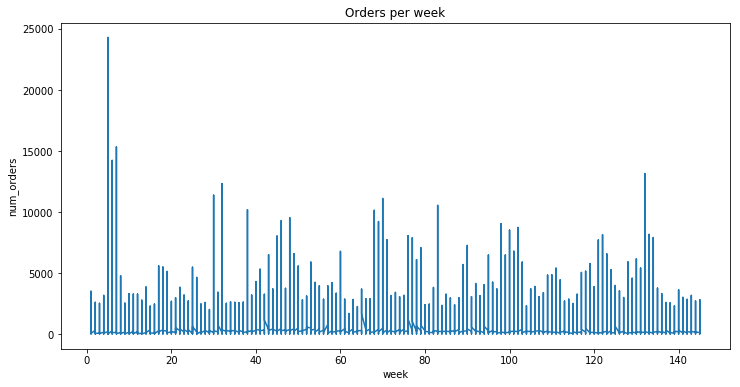

In [29]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,6))
plt.title('Orders per week')
plt.plot(train.week,train.num_orders)
plt.xlabel('week')
plt.ylabel('num_orders')
plt.show()

In [30]:
train[train.columns[1:]].corr()['num_orders'][:-1]

week                    -0.017210
center_id               -0.053035
meal_id                  0.010597
checkout_price          -0.282108
base_price              -0.222306
emailer_for_promotion    0.277147
homepage_featured        0.294490
num_orders               1.000000
city_code                0.041596
region_code              0.029744
Name: num_orders, dtype: float64

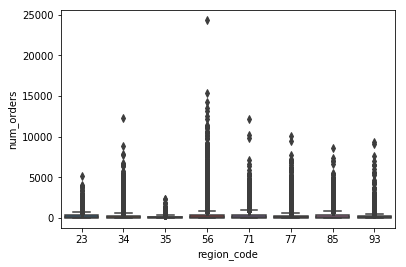

In [31]:
sns.boxplot(x="region_code",y="num_orders",data=train)

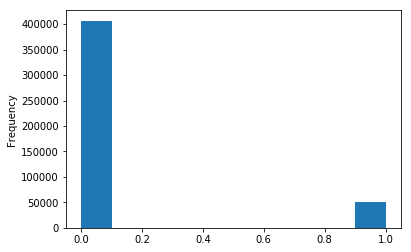

In [33]:
train["homepage_featured"].plot.hist()

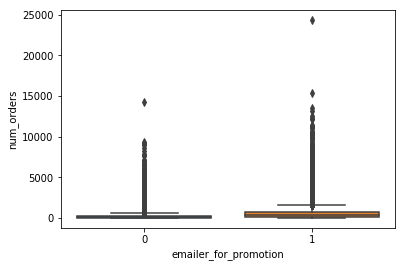

In [34]:
sns.boxplot(x="emailer_for_promotion",y="num_orders",data=train)

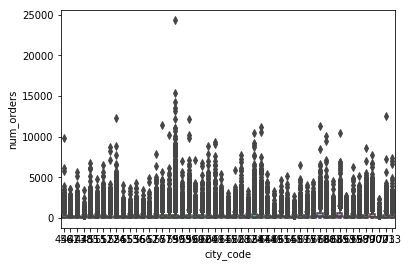

In [37]:
sns.boxplot(x="city_code",y="num_orders",data=train)

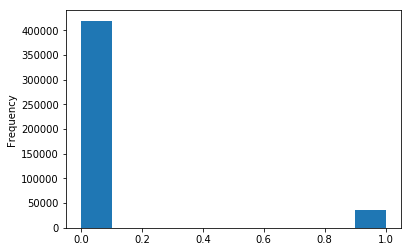

In [38]:
train["emailer_for_promotion"].plot.hist()

In [40]:
train_dummies['month'] = train_dummies['week']/4
train_dummies['week_from_yr_start'] = train_dummies['week']/52
train_dummies['quarter'] = train_dummies['week']/13

In [41]:
train_dummies.drop(['id','week','num_orders','region_code'],inplace=True,axis=1)

In [42]:
train_dummies.head()

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,op_area,category_Biryani,category_Desert,...,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C,month,week_from_yr_start,quarter
0,55,1885,136.83,152.29,0,0,647,2.0,0,0,...,0,0,0,0,1,0,1,0.25,0.019231,0.076923
1,55,1993,136.83,135.83,0,0,647,2.0,0,0,...,0,0,0,0,1,0,1,0.25,0.019231,0.076923
2,55,2539,134.86,135.86,0,0,647,2.0,0,0,...,0,0,0,0,1,0,1,0.25,0.019231,0.076923
3,55,2139,339.50,437.53,0,0,647,2.0,0,0,...,0,0,1,0,0,0,1,0.25,0.019231,0.076923
4,55,2631,243.50,242.50,0,0,647,2.0,0,0,...,0,0,1,0,0,0,1,0.25,0.019231,0.076923


In [43]:
x=train_dummies
y=train['num_orders']

In [45]:
x.head()

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,op_area,category_Biryani,category_Desert,...,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C,month,week_from_yr_start,quarter
0,55,1885,136.83,152.29,0,0,647,2.0,0,0,...,0,0,0,0,1,0,1,0.25,0.019231,0.076923
1,55,1993,136.83,135.83,0,0,647,2.0,0,0,...,0,0,0,0,1,0,1,0.25,0.019231,0.076923
2,55,2539,134.86,135.86,0,0,647,2.0,0,0,...,0,0,0,0,1,0,1,0.25,0.019231,0.076923
3,55,2139,339.50,437.53,0,0,647,2.0,0,0,...,0,0,1,0,0,0,1,0.25,0.019231,0.076923
4,55,2631,243.50,242.50,0,0,647,2.0,0,0,...,0,0,1,0,0,0,1,0.25,0.019231,0.076923


In [46]:
y.head()

0    177
1    270
2    189
3     54
4     40
Name: num_orders, dtype: int64

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2000)
m = RandomForestRegressor(n_jobs=-1,n_estimators=50)
m.fit(x_train,y_train)
pri = m.predict(x_test)
print("Random forest = ",r2_score(y_test,pri)*100)

Random forest =  86.0550019200798


In [49]:
y_test.head()

121042    242
113339    149
384054     15
101137    366
302941    622
Name: num_orders, dtype: int64

In [50]:
test_dummies = pd.get_dummies(data=test, columns=['category','cuisine','center_type'],drop_first=True)

In [51]:
test_dummies['month'] = test_dummies['week']/4
test_dummies['week_from_yr_start'] = test_dummies['week']/52
test_dummies['quarter'] = test_dummies['week']/13

In [52]:
test_dummies.drop(['id','week','region_code'],inplace=True,axis=1)
test_dummies.head()

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,op_area,category_Biryani,category_Desert,...,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C,month,week_from_yr_start,quarter
0,55,1885,158.11,159.11,0,0,647,2.0,0,0,...,0,0,0,0,1,0,1,36.5,2.807692,11.230769
1,55,1993,160.11,159.11,0,0,647,2.0,0,0,...,0,0,0,0,1,0,1,36.5,2.807692,11.230769
2,55,2539,157.14,159.14,0,0,647,2.0,0,0,...,0,0,0,0,1,0,1,36.5,2.807692,11.230769
3,55,2631,162.02,162.02,0,0,647,2.0,0,0,...,0,0,1,0,0,0,1,36.5,2.807692,11.230769
4,55,1248,163.93,163.93,0,0,647,2.0,0,0,...,0,0,1,0,0,0,1,36.5,2.807692,11.230769


In [53]:
pri = m.predict(test_dummies)

In [54]:
df1=pd.read_csv("test.csv")
dict={'id':df1['id'],'num_orders':pri.reshape(-1,1)[:,-1]}
df2=pd.DataFrame(dict)
df2.to_csv('Output.csv',index=False)

# End of the Project

# Thank You!!